In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
data_fr = pd.read_csv('iris.data',header=-1)
data_fr.columns = ['s_len' , 's_wid' ,'p_len', 'p_wid','class']

In [4]:
x = data_fr[['p_len','p_wid']]

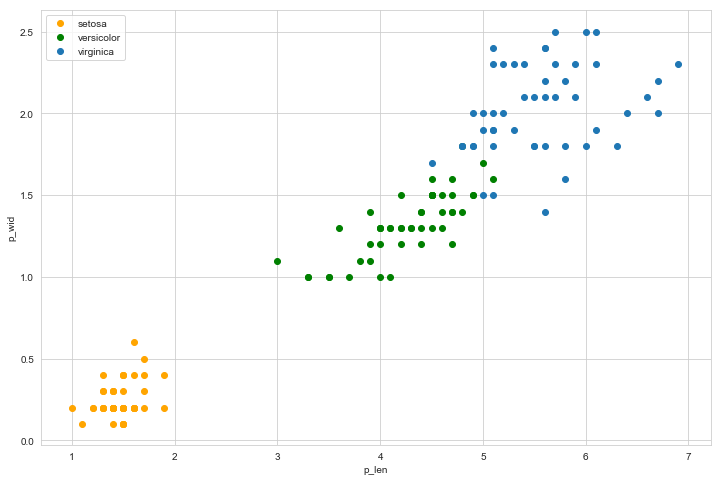

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(data_fr['p_len'][0:50],data_fr['p_wid'][0:50],color='orange',label='setosa')
plt.scatter(data_fr['p_len'][50:100],data_fr['p_wid'][50:100],color='green',label='versicolor')
plt.scatter(data_fr['p_len'][100:150],data_fr['p_wid'][100:150],label='virginica')
plt.legend(loc = 'upper left')
plt.xlabel('p_len');plt.ylabel('p_wid');
plt.show()

In [6]:
data_fr['tmp'] = data_fr['class'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
y = data_fr['tmp']

In [7]:
clf = svm.SVC(kernel='linear',C=1.2)
clf.fit(x,y)

SVC(C=1.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
xv = x.values.reshape(-1,1)

In [9]:
h = 0.01
x_min, x_max = xv.min(), xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

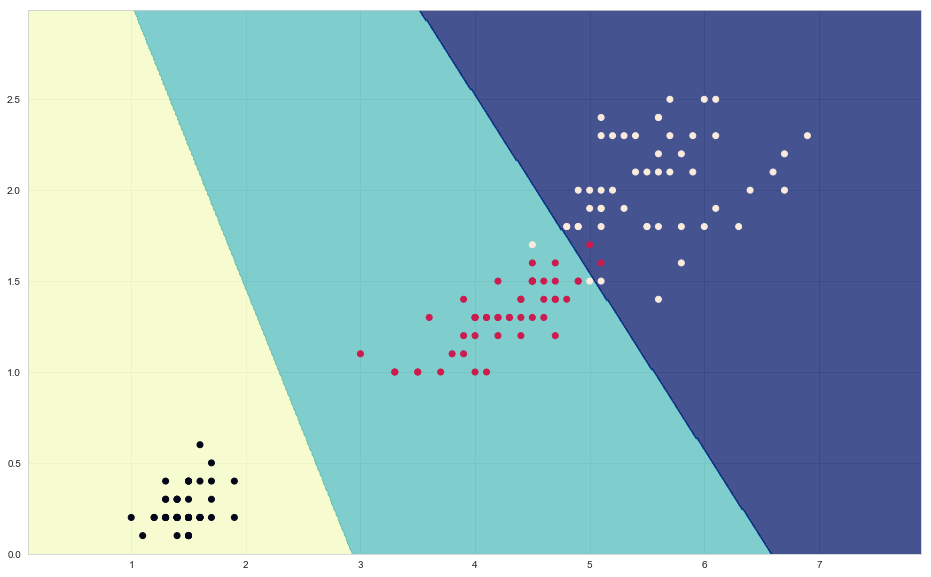

In [10]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'YlGnBu', alpha=0.8);
plt.scatter(x.values[:, 0], x.values[:, 1], c=y);

## Linear SVM Implementation

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.85,random_state=0)

In [13]:
sc_x = StandardScaler()
x_std_train = sc_x.fit_transform(x_train)

In [14]:
clf = svm.SVC(kernel='linear',C=1)
clf.fit(x_std_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

Cross Validation within Train Dataset

In [16]:
res = cross_val_score(clf, x_std_train, y_train, cv=12, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9524
Accuracy SD: 		 0.0609


In [17]:
y_train_predict = cross_val_predict(clf, x_std_train, y_train, cv=12)

In [18]:
confusion_matrix(y_train, y_train_predict)

array([[43,  0,  0],
       [ 0, 36,  3],
       [ 0,  3, 42]], dtype=int64)

In [19]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train,y_train_predict,average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,y_train_predict,average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,y_train_predict,average='weighted')))

Precision Score: 	 0.9528
Recall Score: 		 0.9528
F1 Score: 		 0.9528


Cross Validation within Test Dataset

In [20]:
y_test_predict = cross_val_predict(clf, sc_x.fit_transform(x_test), y_test, cv=3)

In [21]:
confusion_matrix(y_test, y_test_predict)

array([[ 7,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  4]], dtype=int64)

In [22]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test,y_test_predict,average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,y_test_predict,average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,y_test_predict,average='weighted')))

Precision Score: 	 0.9601
Recall Score: 		 0.9565
F1 Score: 		 0.9551


***
# Poly-SVM

In [23]:
poly_clf = svm.SVC(kernel='poly',degree = 4.2 , C = 1.0)
poly_clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4.2, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
xv = x.values.reshape(-1,1)
h = 0.01
x_min, x_max = xv.min(), xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

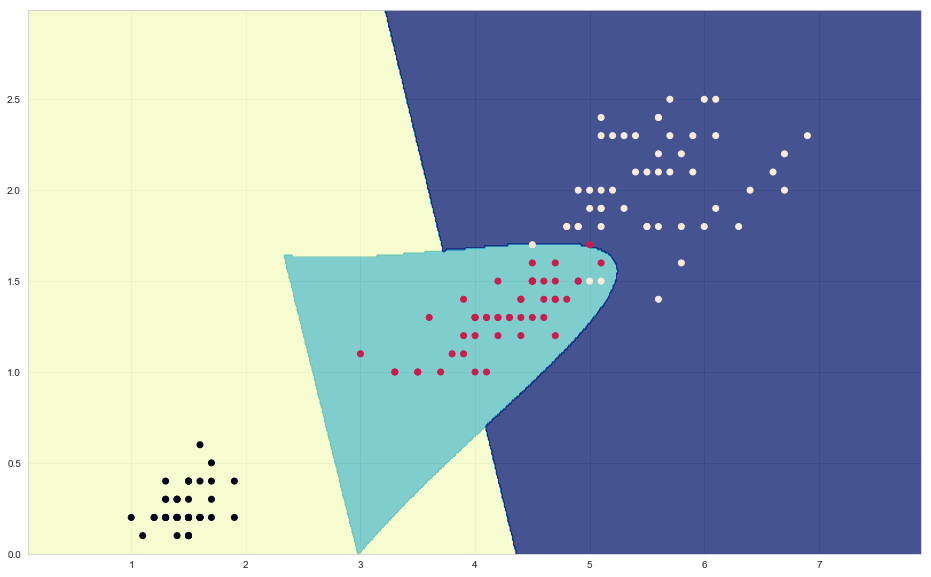

In [25]:
z = poly_clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'YlGnBu', alpha=0.8);
plt.scatter(x.values[:, 0], x.values[:, 1], c=y);

## polySVM Implementation

In [26]:
sc_x = StandardScaler()
x_std_train = sc_x.fit_transform(x_train)

In [27]:
poly_clf = svm.SVC(kernel='poly',degree=3,C=1)
poly_clf.fit(x_std_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Cross Validation within Train Dataset

In [28]:
res = cross_val_score(poly_clf, x_std_train, y_train, cv=12, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9626
Accuracy SD: 		 0.0579


In [29]:
y_train_predict = cross_val_predict(poly_clf, x_std_train, y_train, cv=12)

In [30]:
confusion_matrix(y_train, y_train_predict)

array([[43,  0,  0],
       [ 0, 39,  0],
       [ 0,  5, 40]], dtype=int64)

In [31]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train,y_train_predict,average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,y_train_predict,average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,y_train_predict,average='weighted')))

Precision Score: 	 0.9651
Recall Score: 		 0.9606
F1 Score: 		 0.9607


Cross Validation within Test Dataset

In [32]:
y_test_predict = cross_val_predict(poly_clf, sc_x.fit_transform(x_test), y_test, cv=3)

In [33]:
confusion_matrix(y_test, y_test_predict)

array([[ 7,  0,  0],
       [ 0, 11,  0],
       [ 0,  2,  3]], dtype=int64)

In [34]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test,y_test_predict,average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,y_test_predict,average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,y_test_predict,average='weighted')))

Precision Score: 	 0.9264
Recall Score: 		 0.9130
F1 Score: 		 0.9058


***
# rbf

In [35]:
C = 1.0
clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(x_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV 

In [37]:
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=1, gamma=0.1))]) 

In [38]:
params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20), 
          'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)} 

In [39]:
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy') 

In [40]:
svm_grid_rbf.fit(x_train, y_train) 

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    6.7s finished
C:\Users\q\Anaconda3\envs\iris_2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('clf', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20), 'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [41]:
svm_grid_rbf.best_params_

{'clf__C': 1, 'clf__gamma': 1}

In [42]:
svm_grid_rbf.best_estimator_.get_params() 

{'memory': None,
 'steps': [('clf', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False))],
 'clf': SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'clf__C': 1,
 'clf__cache_size': 200,
 'clf__class_weight': None,
 'clf__coef0': 0.0,
 'clf__decision_function_shape': 'ovr',
 'clf__degree': 3,
 'clf__gamma': 1,
 'clf__kernel': 'rbf',
 'clf__max_iter': -1,
 'clf__probability': False,
 'clf__random_state': None,
 'clf__shrinking': True,
 'clf__tol': 0.001,
 'clf__verbose': False}

In [43]:
y_test_predict = svm_grid_rbf.predict(x_test)

In [44]:
confusion_matrix(y_test, y_test_predict)

array([[ 7,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  5]], dtype=int64)

In [45]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test,y_test_predict,average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,y_test_predict,average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,y_test_predict,average='weighted')))

Precision Score: 	 1.0000
Recall Score: 		 1.0000
F1 Score: 		 1.0000


In [46]:
xv = x.values.reshape(-1,1)
h = 0.01
x_min, x_max = xv.min(), xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

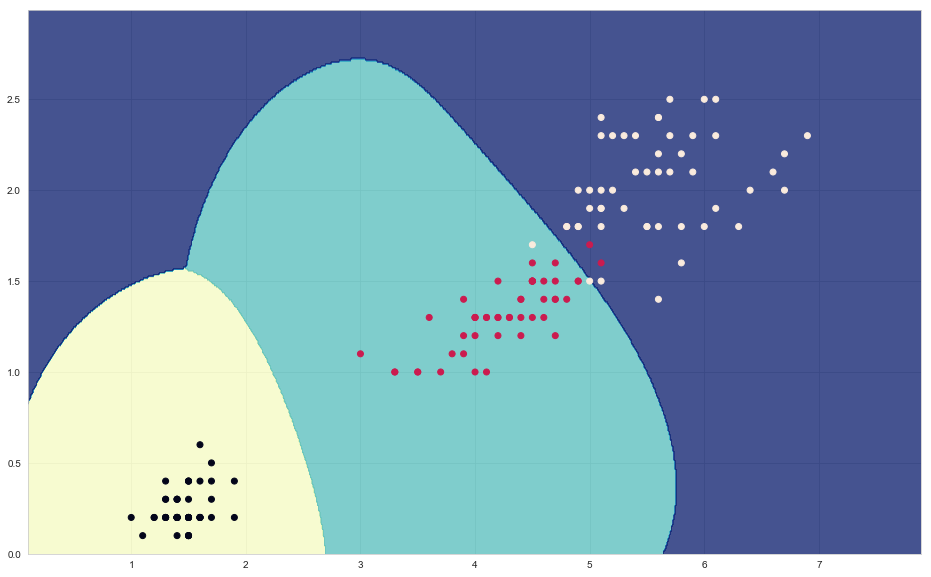

In [47]:
z = svm_grid_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'YlGnBu', alpha=0.8);
plt.scatter(x.values[:, 0], x.values[:, 1], c=y);

***
# sigmoid

In [48]:
C = 1.0
clf = svm.SVC(kernel='sigmoid', gamma=0.7, C=C)
clf.fit(x_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV 

In [50]:
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', coef0=0.1, gamma=0.1))]) 

In [51]:
params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20), 
          'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)} 

In [52]:
svm_grid_sig = GridSearchCV(pipeline, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy') 

In [53]:
svm_grid_sig.fit(x_train, y_train) 

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    0.8s finished
C:\Users\q\Anaconda3\envs\iris_2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.1,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20), 'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [54]:
svm_grid_sig.best_params_

{'clf__C': 1, 'clf__gamma': 1}

In [55]:
svm_grid_sig.best_estimator_.get_params() 

{'memory': None,
 'steps': [('clf', SVC(C=1, cache_size=200, class_weight=None, coef0=0.1,
     decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False))],
 'clf': SVC(C=1, cache_size=200, class_weight=None, coef0=0.1,
   decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 'clf__C': 1,
 'clf__cache_size': 200,
 'clf__class_weight': None,
 'clf__coef0': 0.1,
 'clf__decision_function_shape': 'ovr',
 'clf__degree': 3,
 'clf__gamma': 1,
 'clf__kernel': 'rbf',
 'clf__max_iter': -1,
 'clf__probability': False,
 'clf__random_state': None,
 'clf__shrinking': True,
 'clf__tol': 0.001,
 'clf__verbose': False}

In [56]:
y_test_predict = svm_grid_sig.predict(x_test)

In [57]:
confusion_matrix(y_test, y_test_predict)

array([[ 7,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  5]], dtype=int64)

In [58]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test,y_test_predict,average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,y_test_predict,average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,y_test_predict,average='weighted')))

Precision Score: 	 1.0000
Recall Score: 		 1.0000
F1 Score: 		 1.0000


In [59]:
xv = x.values.reshape(-1,1)
h = 0.01
x_min, x_max = xv.min(), xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

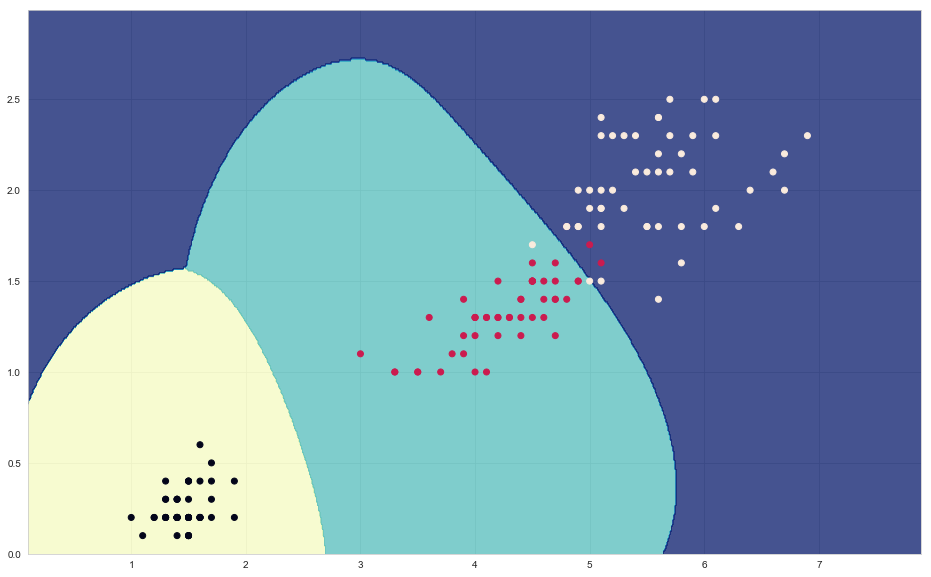

In [60]:
z = svm_grid_sig.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'YlGnBu', alpha=0.8);
plt.scatter(x.values[:, 0], x.values[:, 1], c=y);

***
# Custom kernel

In [61]:
def my_kernel(X, Y):
    M = np.array([[3, 0], [0, 1.0]])
    Z = np.dot(X, M)
    return np.dot(Z, Y.T)

In [62]:
clf = svm.SVC(kernel=my_kernel)
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel=<function my_kernel at 0x000000000550BE18>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

In [63]:
xv = x.values.reshape(-1,1)

In [64]:
h = 0.01
x_min, x_max = xv.min(), xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

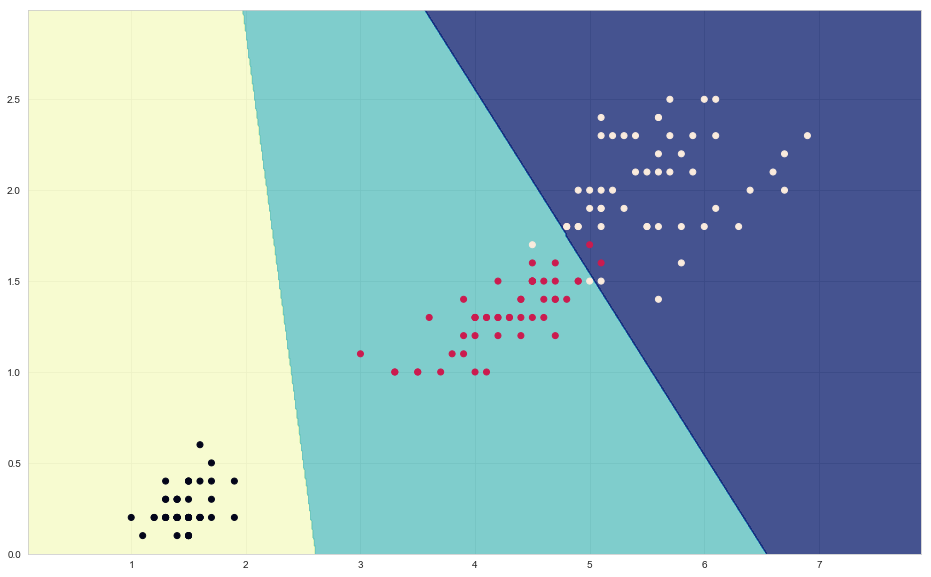

In [65]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'YlGnBu', alpha=0.8);
plt.scatter(x.values[:, 0], x.values[:, 1], c=y);

***
# svr

In [66]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
from sklearn.datasets import load_boston
boston_data = load_boston()
data_fr = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
data_fr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [68]:
y = boston_data.target
x = data_fr[['LSTAT']].values

In [69]:
svr = SVR()
svr.fit(x, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
sort_idx = x.flatten().argsort()

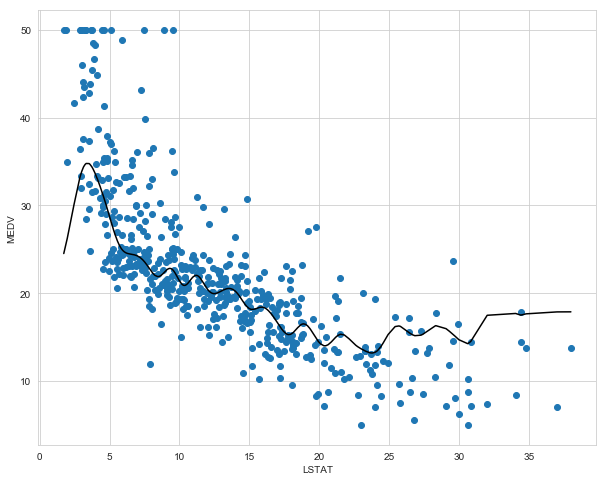

In [71]:
plt.figure(figsize=(10,8))
plt.scatter(x[sort_idx], y[sort_idx])
plt.plot(x[sort_idx], svr.predict(x[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)

Linear Kernel

In [73]:
svr = SVR(kernel='linear')
svr.fit(x_train, y_train)
y_train_predict = svr.predict(x_train)
y_test_predict = svr.predict(x_test)
print("MSE train: ",mean_squared_error(y_train, y_train_predict),"\t\tMSE test: " ,mean_squared_error(y_test, y_test_predict))
print("R^2 train: ",r2_score(y_train, y_train_predict),"\t\tR^2 test: " ,r2_score(y_test, y_test_predict))

MSE train:  39.70233571727422 		MSE test:  47.05307062634418
R^2 train:  0.53370212608689 		R^2 test:  0.42215433368953614


Poly Kernel

In [74]:
svr = SVR(kernel='poly', C=1, degree=2)
svr.fit(x_train, y_train)
y_train_predict = svr.predict(x_train)
y_test_predict = svr.predict(x_test)
print("MSE train: ",mean_squared_error(y_train, y_train_predict),"\t\tMSE test: " ,mean_squared_error(y_test, y_test_predict))
print("R^2 train: ",r2_score(y_train, y_train_predict),"\t\tR^2 test: " ,r2_score(y_test, y_test_predict))

MSE train:  54.85804402441918 		MSE test:  59.70213121594157
R^2 train:  0.35570064497518505 		R^2 test:  0.2668147406023842


rbf

In [75]:
svr = SVR(kernel='rbf', C=1, gamma=0.1)
svr.fit(x_train, y_train)
y_train_predict = svr.predict(x_train)
y_test_predict = svr.predict(x_test)
print("MSE train: ",mean_squared_error(y_train, y_train_predict),"\t\tMSE test: " ,mean_squared_error(y_test, y_test_predict))
print("R^2 train: ",r2_score(y_train, y_train_predict),"\t\tR^2 test: " ,r2_score(y_test, y_test_predict))

MSE train:  30.676789015597276 		MSE test:  39.296532752319585
R^2 train:  0.6397057946837557 		R^2 test:  0.5174102168107677
